In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

The weights obtained from Newtons method of optimization are
[-1.84922892 -0.62814188  0.85846843]


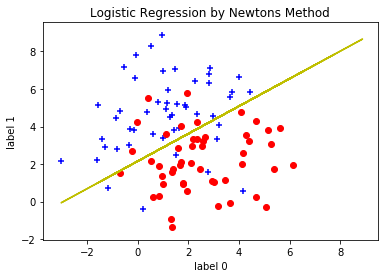

In [2]:
def main():
  # We format the data matrix so that each row is the feature for one sample.    
  # The number of rows is the number of data samples.    
  # The number of columns is the dimension of one data sample.  
  #path = '/Users/Nidhi/Downloads/'
  X = np.load('q1x.npy')  
  N = X.shape[0]    
  Y = np.load('q1y.npy')    
  # To consider intercept term, we append a column vector with all entries=1.    
  # Then the coefficient correpsonding to this column is an intercept term. 
  X = np.concatenate((np.ones((N, 1)), X), axis=1)
  Z = np.diag(Y).dot(X)
  Z_ = np.diag(1-Y).dot(X)
  w = np.zeros((X.shape[1],))
  #define the gradient function
  def grad_lw(w, X, Z, Z_):
    sig = 1 / (1 + np.exp(-X.dot(w)))
    grad = (1-sig).dot(Z) - (sig).dot(Z_)
    return grad
  w = np.zeros((X.shape[1],))

#Newton's Method
  E_w = np.Infinity
  i = 0
  while E_w > 1e-5:
    old_w = w
    sig = 1 / (1 + np.exp(-X.dot(w)))
    hessian = np.zeros((X.shape[1], X.shape[1]))
    h = np.dot(X, old_w)
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            for n in range(N):
                hessian[j][i] += sig[n] * (sig[n]-1) * X[n,i] * X[n,j]
    w = old_w - np.linalg.pinv(hessian).dot(grad_lw(w,X,Z,Z_))
    h_new = np.dot(X,w)
    E_w = np.linalg.norm(h_new - h)
    i = i+1
  print("The weights obtained from Newtons method of optimization are")
  print(w)
  #Scatter Plot
  idx_1 = np.where(Y == 1)
  idx_0 = np.where(Y == 0)
  x1 = X[:,1]
  x2 = X[:,2]
  plt.plot(X, (-w[0] - w[1]*X)/w[2], color = 'y')
  plt.scatter(x1[idx_1], x2[idx_1], color = 'b', marker = "+")
  plt.scatter(x1[idx_0], x2[idx_0], color = 'r')
  plt.title('Logistic Regression by Newtons Method')
  plt.xlabel('label 0')
  plt.ylabel('label 1')
  plt.show()

if __name__ == "__main__":
  main()